In [1]:
#wine database
""" clasify wines, understand types of wine,
recomend wines for me?
effects of ageing on wine (ie more or less alcohol?)
what varieties are more similar or different, what countries produce similar wines?
how different are expensive and cheap wines?"""
#dataset:
#https://www.kaggle.com/dev7halo/wine-information

"""Data informations.
1) id - wine ID
2) name - wine Name
3) producer - 
4) nation - Country of origin
5) local1 - region1
6) local2 - region2
7) local3 - region3
8) local4 - region4
9) ~ 20) varieties1 ~ varieties12 - wine varieties
21) type - wine type
22) use - wine use
23) abv - Alcohol by volume
24) degree - Drinking temperature
25) sweet - Sweet rank (score between 1 and 5)
26) acidity - Acidity rank (score between 1 and 5)
27) body - Body rank (score between 1 and 5)
28) tannin - Tannin rank (score between 1 and 5)
29) price - wine price that based on WON NOT dollars!! (₩, WON)
30) year - Production year
31) ml - wine Volume (milliliter)"""

'Data informations.\n1) id - wine ID\n2) name - wine Name\n3) producer - \n4) nation - Country of origin\n5) local1 - region1\n6) local2 - region2\n7) local3 - region3\n8) local4 - region4\n9) ~ 20) varieties1 ~ varieties12 - wine varieties\n21) type - wine type\n22) use - wine use\n23) abv - Alcohol by volume\n24) degree - Drinking temperature\n25) sweet - Sweet rank (score between 1 and 5)\n26) acidity - Acidity rank (score between 1 and 5)\n27) body - Body rank (score between 1 and 5)\n28) tannin - Tannin rank (score between 1 and 5)\n29) price - wine price that based on WON NOT dollars!! (₩, WON)\n30) year - Production year\n31) ml - wine Volume (milliliter)'

In [2]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn import cluster
from sklearn import neighbors

In [3]:
dataset =pd.read_csv('wine_info.csv')

In [4]:
#EDA
dataset.head()

,id,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
0,137197,Altair,알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Carmenere,...,Table,14~15,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000.0,2014.0,750.0
1,137198,"Altair, Sideral",알타이르 Altair,칠레 Chile,라펠 밸리 Rapel Valley,NaN,NaN,NaN,Cabernet Sauvignon,Merlot,...,Table,14~15,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000.0,2016.0,750.0
2,137199,Baron du Val Red,바론 듀 발 Baron du Val,프랑스 France,NaN,NaN,NaN,NaN,Carignan,Cinsault,...,Table,11~12,15~17,SWEET2,ACIDITY3,BODY2,TANNIN2,NaN,NaN,750.0
3,137200,Baron du Val White,바론 듀 발 Baron du Val,프랑스 France,NaN,NaN,NaN,NaN,Carignan,Ugni​ blanc,...,Table,11~12,9~11,SWEET1,ACIDITY3,BODY2,TANNIN1,NaN,NaN,750.0
4,137201,"Benziger, Cabernet Sauvignon",벤지거 Benziger,미국 U.S.A,캘리포니아 California,NaN,NaN,NaN,Cabernet Sauvignon,NaN,...,Table,13~14,17~19,SWEET1,ACIDITY3,BODY3,TANNIN4,NaN,2003.0,750.0


In [5]:
#2.2.a missing values
dataset.isna().sum()

id                 0
name               0
producer           0
nation             0
local1           892
local2         10459
local3         18010
local4         21603
varieties1       349
varieties2     14087
varieties3     17577
varieties4     20275
varieties5     21226
varieties6     21500
varieties7     21574
varieties8     21587
varieties9     21598
varieties10    21599
varieties11    21600
varieties12    21601
type              58
use               14
abv             7146
degree          7145
sweet              2
acidity           13
body              13
tannin            13
price           9093
year            2601
ml               134
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21605 entries, 0 to 21604
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21605 non-null  int64  
 1   name         21605 non-null  object 
 2   producer     21605 non-null  object 
 3   nation       21605 non-null  object 
 4   local1       20713 non-null  object 
 5   local2       11146 non-null  object 
 6   local3       3595 non-null   object 
 7   local4       2 non-null      object 
 8   varieties1   21256 non-null  object 
 9   varieties2   7518 non-null   object 
 10  varieties3   4028 non-null   object 
 11  varieties4   1330 non-null   object 
 12  varieties5   379 non-null    object 
 13  varieties6   105 non-null    object 
 14  varieties7   31 non-null     object 
 15  varieties8   18 non-null     object 
 16  varieties9   7 non-null      object 
 17  varieties10  6 non-null      object 
 18  varieties11  5 non-null      object 
 19  vari

In [7]:
dataset.describe()

,id,price,year,ml
count,21605.000000,1.251200e+04,19004.000000,21471.000000
mean,153998.163666,1.600060e+05,2012.195275,748.541894
std,9200.852348,3.146727e+05,4.962949,133.168071
min,137197.000000,3.900000e+03,1967.000000,100.000000
25%,146645.000000,4.000000e+04,2008.000000,750.000000
50%,153748.000000,7.400000e+04,2013.000000,750.000000
75%,162431.000000,1.600000e+05,2016.000000,750.000000
max,168707.000000,8.000000e+06,2020.000000,6000.000000


In [8]:
check unique values for every column
wine_cols = dataset.columns
for f in wine_cols:
    #print(f)
    #print(dataset[f].unique())
    #print()

SyntaxError: invalid syntax (<ipython-input-8-946ea690c395>, line 1)

In [10]:
#check number of unique values for every column
wine_cols = dataset.columns
for f in wine_cols:
    print(f)
    print(dataset[f].nunique())
    print()

id
21605

name
21531

producer
4825

nation
33

local1
214

local2
282

local3
163

local4
1

varieties1
352

varieties2
281

varieties3
208

varieties4
144

varieties5
84

varieties6
46

varieties7
27

varieties8
15

varieties9
7

varieties10
6

varieties11
5

varieties12
4

type
9

use
12

abv
184

degree
81

sweet
5

acidity
5

body
5

tannin
5

price
847

year
43

ml
20



In [11]:
#we need to turn abv, degree, sweet, acidity, body, tannin to numerical (or ordinal) values

#abv, degree: retreive values and average them

#sweet, acidity, body, tannin: will use only number 1 to five

In [12]:
#create new dataframe with numeriacl values
datanum = dataset.copy()

In [13]:
#2.3.a
#Converting abv to numerical datafield
datanum[['abv1', 'abv2']] = dataset['abv'].str.split(pat='~', expand = True).astype(float)
datanum['num_abv'] = datanum[['abv1', 'abv2']].sum(axis=1)/2
datanum.drop(['abv', 'abv1', 'abv2'], axis = 1, inplace=True)

In [14]:
#2.3.b
#Converting degree to numerical datafield
datanum[['num_degree']] = dataset['degree'].str.split(pat='~', expand = True).astype(float).sum(axis=1)/2

datanum.drop(['degree'], axis = 1, inplace=True)

In [15]:
#Replace zeros generated with nan.
datanum.replace({0.0:np.nan}, inplace = True)
datanum.isna().sum()


id                 0
name               0
producer           0
nation             0
local1           892
local2         10459
local3         18010
local4         21603
varieties1       349
varieties2     14087
varieties3     17577
varieties4     20275
varieties5     21226
varieties6     21500
varieties7     21574
varieties8     21587
varieties9     21598
varieties10    21599
varieties11    21600
varieties12    21601
type              58
use               14
sweet              2
acidity           13
body              13
tannin            13
price           9093
year            2601
ml               134
num_abv         7147
num_degree      7145
dtype: int64

In [16]:
#2.3.e
#Droping local columns
#'local1,local2, local3, local4'
datanum.drop(['local1','local2', 'local3', 'local4'], axis = 1, inplace=True)

In [17]:
#2.3.f
#create Blend Column and delete varieties 2-12 columns

datanum['blend'] = 1
datanum.loc[datanum.varieties2.isna(),'blend'] = 0.0

print(datanum.loc[:, ['varieties1', 'varieties2', 'blend']])

#Droping local columns

datanum.drop(['varieties2','varieties3', 'varieties4','varieties5','varieties6','varieties7',
              'varieties8','varieties9','varieties10','varieties11','varieties12'],
             axis = 1, inplace=True)

print(datanum.columns)

               varieties1    varieties2  blend
0      Cabernet Sauvignon     Carmenere      1
1      Cabernet Sauvignon        Merlot      1
2                Carignan      Cinsault      1
3                Carignan   Ugni​ blanc      1
4      Cabernet Sauvignon           NaN      0
...                   ...           ...    ...
21600       Pinot Meunier    Chardonnay      1
21601          Chardonnay  Chenin Blanc      1
21602          Chardonnay    Pinot Noir      1
21603          Chardonnay           NaN      0
21604              Muscat           NaN      0

[21605 rows x 3 columns]
Index(['id', 'name', 'producer', 'nation', 'varieties1', 'type', 'use',
       'sweet', 'acidity', 'body', 'tannin', 'price', 'year', 'ml', 'num_abv',
       'num_degree', 'blend'],
      dtype='object')


In [18]:
datanum[['sweet', 'acidity', 'body', 'tannin']].head()

,sweet,acidity,body,tannin
0,SWEET1,ACIDITY4,BODY5,TANNIN4
1,SWEET1,ACIDITY3,BODY4,TANNIN4
2,SWEET2,ACIDITY3,BODY2,TANNIN2
3,SWEET1,ACIDITY3,BODY2,TANNIN1
4,SWEET1,ACIDITY3,BODY3,TANNIN4


In [19]:
#2.3.c
#converting sweet, acidity, body, tannin to ordinal number 1 to 5

replace_cat = {'SWEET1':1, 'SWEET2':2,'SWEET3':3, 'SWEET4':4, 'SWEET5':5,
               'ACIDITY1':1,'ACIDITY2':2,'ACIDITY3':3,'ACIDITY4':4,'ACIDITY5':5,
               'BODY1':1, 'BODY2':2,'BODY3':3,'BODY4':4,'BODY5':5,
               'TANNIN1':1, 'TANNIN2':2, 'TANNIN3':3, 'TANNIN4':4, 'TANNIN5':5}

datanum = datanum.replace(replace_cat)

datanum.columns

Index(['id', 'name', 'producer', 'nation', 'varieties1', 'type', 'use',
       'sweet', 'acidity', 'body', 'tannin', 'price', 'year', 'ml', 'num_abv',
       'num_degree', 'blend'],
      dtype='object')

In [20]:
datanum.describe()

,id,sweet,acidity,body,tannin,price,year,ml,num_abv,num_degree,blend
count,21605.000000,21603.000000,21592.000000,21592.000000,21592.000000,1.251200e+04,19004.000000,21471.000000,14458.000000,14460.000000,21605.000000
mean,153998.163666,1.269592,3.380743,3.331882,2.491293,1.600060e+05,2012.195275,748.541894,8.756464,14.233195,0.347975
std,9200.852348,0.831568,0.780147,0.894917,1.257139,3.146727e+05,4.962949,133.168071,3.489784,3.768499,0.476339
min,137197.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+03,1967.000000,100.000000,1.000000,2.000000,0.000000
25%,146645.000000,1.000000,3.000000,3.000000,1.000000,4.000000e+04,2008.000000,750.000000,6.500000,11.000000,0.000000
50%,153748.000000,1.000000,3.000000,3.000000,3.000000,7.400000e+04,2013.000000,750.000000,7.000000,16.000000,0.000000
75%,162431.000000,1.000000,4.000000,4.000000,3.000000,1.600000e+05,2016.000000,750.000000,12.500000,17.000000,1.000000
max,168707.000000,5.000000,5.000000,5.000000,5.000000,8.000000e+06,2020.000000,6000.000000,35.000000,75.000000,1.000000


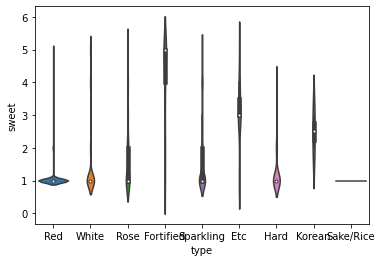

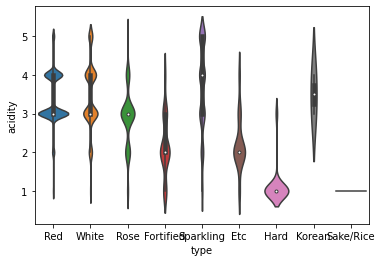

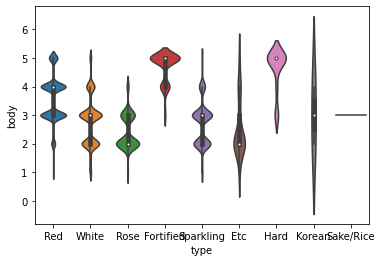

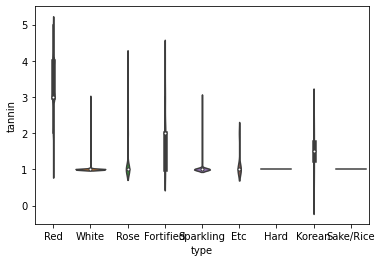

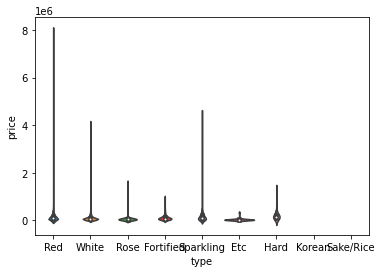

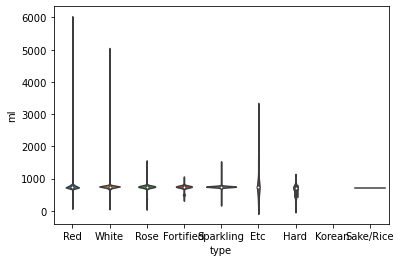

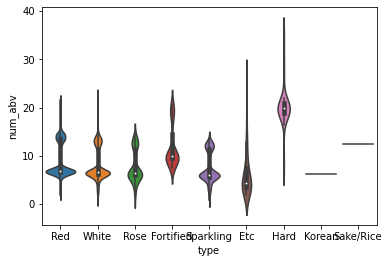

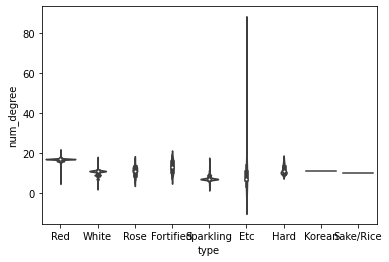

In [21]:
for c in ['sweet','acidity', 'body', 'tannin', 'price', 'ml', 'num_abv','num_degree']:
    sns.violinplot(x="type", y=c, data=datanum)
    plt.show()


In [22]:
datanum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21605 entries, 0 to 21604
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          21605 non-null  int64  
 1   name        21605 non-null  object 
 2   producer    21605 non-null  object 
 3   nation      21605 non-null  object 
 4   varieties1  21256 non-null  object 
 5   type        21547 non-null  object 
 6   use         21591 non-null  object 
 7   sweet       21603 non-null  float64
 8   acidity     21592 non-null  float64
 9   body        21592 non-null  float64
 10  tannin      21592 non-null  float64
 11  price       12512 non-null  float64
 12  year        19004 non-null  float64
 13  ml          21471 non-null  float64
 14  num_abv     14458 non-null  float64
 15  num_degree  14460 non-null  float64
 16  blend       21605 non-null  int64  
dtypes: float64(9), int64(2), object(6)
memory usage: 2.8+ MB


In [23]:
datanum.type.value_counts()

Red          13853
White         5480
Sparkling     1587
Rose           336
Fortified      155
Hard            70
Etc             63
Korean           2
Sake/Rice        1
Name: type, dtype: int64

In [24]:
#2.3.d
#we are going to drop Fortified, hard, Etc, Korean and Sake types.
#We will only keep "real wine".
to_drop = datanum[datanum.type.isin(['Fortified', 'Hard', 'Etc', 'Korean', 'Sake/Rice' ])].index

to_drop

Int64Index([   51,   211,   461,   462,   528,   529,   530,   531,   652,
              661,
            ...
            21223, 21332, 21333, 21334, 21426, 21570, 21571, 21572, 21593,
            21594],
           dtype='int64', length=291)

In [25]:
datanum.drop(to_drop, inplace=True)

In [26]:
datanum.type.value_counts()

Red          13853
White         5480
Sparkling     1587
Rose           336
Name: type, dtype: int64

In [27]:
datanum.describe()

,id,sweet,acidity,body,tannin,price,year,ml,num_abv,num_degree,blend
count,21314.000000,21312.000000,21301.000000,21301.000000,21301.000000,1.231500e+04,18950.000000,21189.000000,14201.000000,14205.000000,21314.000000
mean,153993.519705,1.243994,3.400498,3.319985,2.504155,1.605474e+05,2012.216095,748.996319,8.683960,14.263006,0.347846
std,9193.543305,0.784129,0.760540,0.885220,1.257781,3.164702e+05,4.928697,131.723106,3.362585,3.657246,0.476298
min,137197.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+03,1967.000000,100.000000,1.000000,2.000000,0.000000
25%,146663.250000,1.000000,3.000000,3.000000,1.000000,4.000000e+04,2009.000000,750.000000,6.500000,11.000000,0.000000
50%,153721.500000,1.000000,3.000000,3.000000,3.000000,7.400000e+04,2013.000000,750.000000,7.000000,16.500000,0.000000
75%,162434.750000,1.000000,4.000000,4.000000,3.000000,1.600000e+05,2016.000000,750.000000,12.500000,17.000000,1.000000
max,168707.000000,5.000000,5.000000,5.000000,5.000000,8.000000e+06,2020.000000,6000.000000,22.500000,21.500000,1.000000


In [28]:
datanum.blend.value_counts()

0    13900
1     7414
Name: blend, dtype: int64

In [29]:
datanum.isna().sum()

id               0
name             0
producer         0
nation           0
varieties1     335
type            58
use             11
sweet            2
acidity         13
body            13
tannin          13
price         8999
year          2364
ml             125
num_abv       7113
num_degree    7109
blend            0
dtype: int64

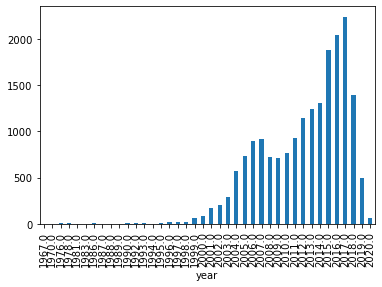

In [30]:
#number of wines per year of production
datanum.groupby('year').size().plot(kind='bar')
plt.show()

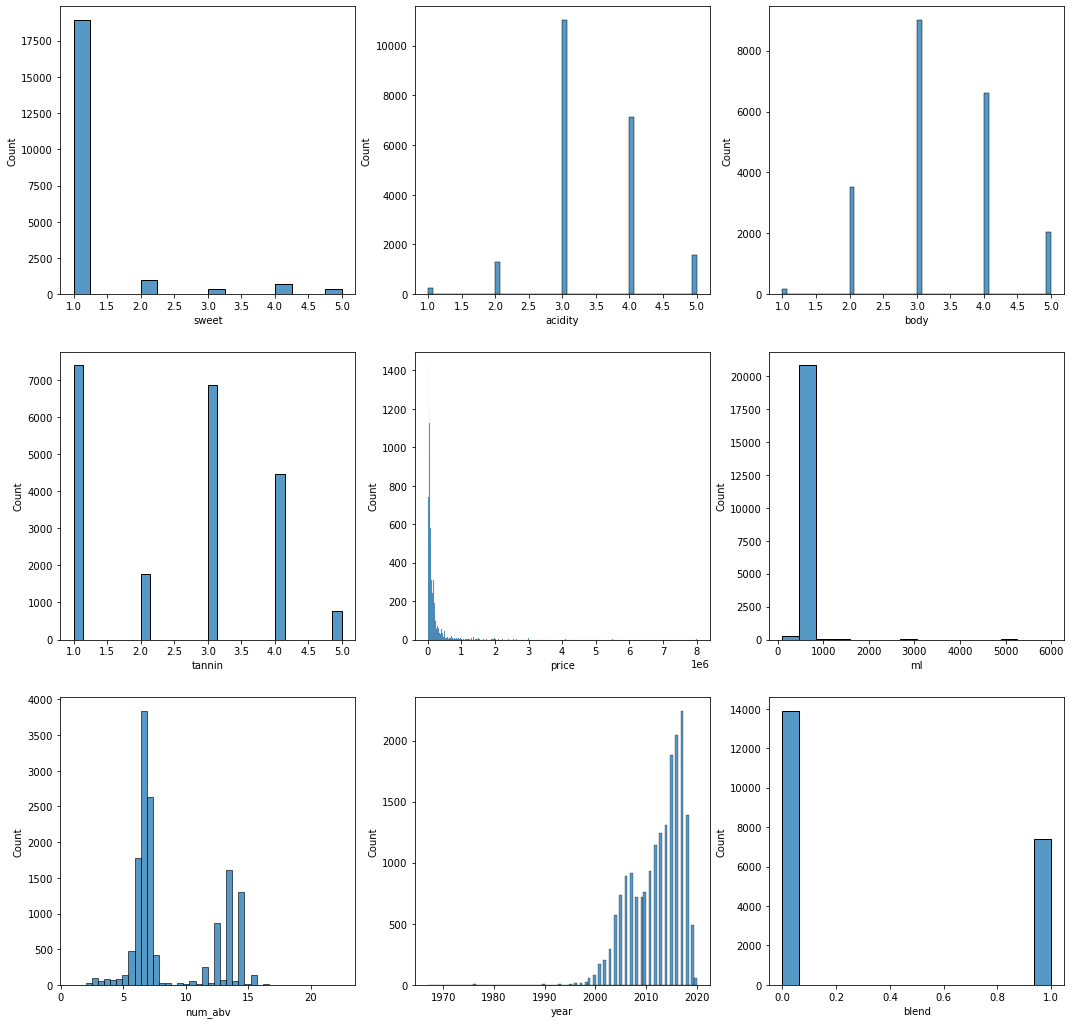

In [31]:
#2.2.d general distribution of attributes 

plt.figure(figsize=(18,18))#, constrained_layout = True)
plt.tight_layout()
i=1
for c in ['sweet','acidity', 'body', 'tannin', 'price', 'ml', 'num_abv', 'year', 'blend']:
    plt.subplot(3, 3, i)
    sns.histplot(data=datanum, x=c)
    #plt.show()
    i +=1
plt.show()

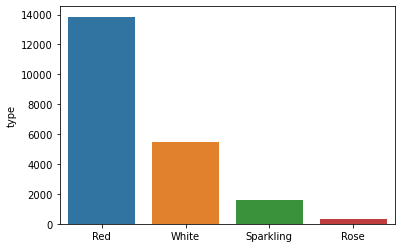

In [32]:
datatype= pd.DataFrame(datanum.type.value_counts())

#plt.figure(figsize=(18,18))#, constrained_layout = True)
plt.tight_layout()
sns.barplot(y = datatype.type, x=datatype.index)
plt.show()

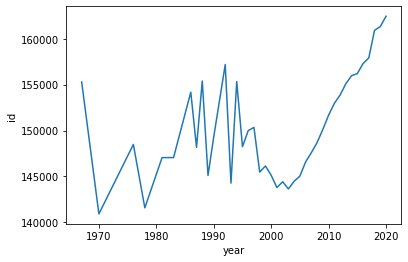

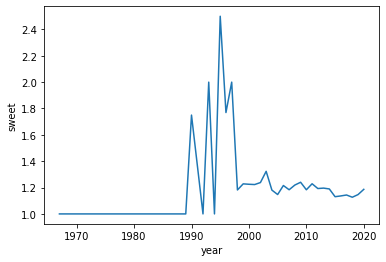

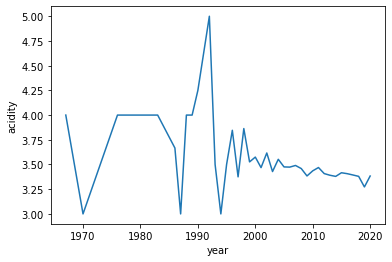

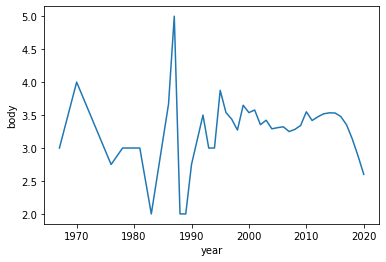

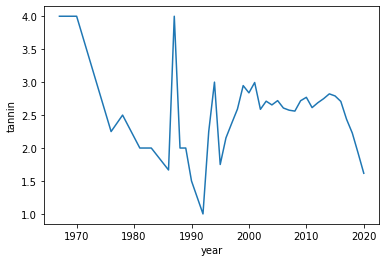

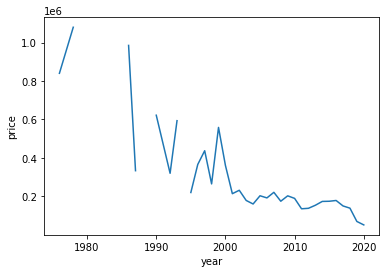

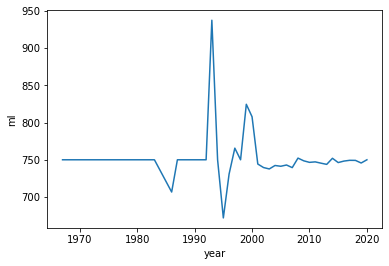

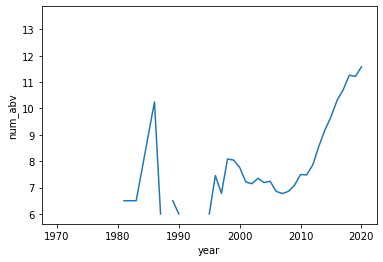

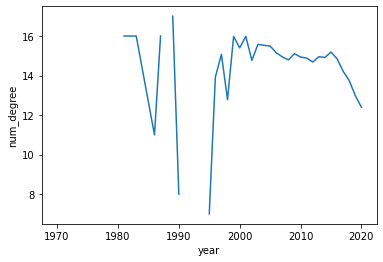

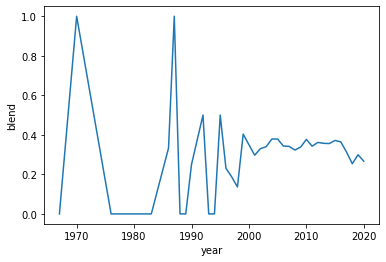

In [33]:
#any obvious effect of age in wines?
data_years = datanum[datanum.year > 1950].groupby('year').mean()

for a in data_years.columns:
    data_years[a].plot()
    plt.ylabel(a)
    plt.show()

In [34]:
datanum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21314 entries, 0 to 21604
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          21314 non-null  int64  
 1   name        21314 non-null  object 
 2   producer    21314 non-null  object 
 3   nation      21314 non-null  object 
 4   varieties1  20979 non-null  object 
 5   type        21256 non-null  object 
 6   use         21303 non-null  object 
 7   sweet       21312 non-null  float64
 8   acidity     21301 non-null  float64
 9   body        21301 non-null  float64
 10  tannin      21301 non-null  float64
 11  price       12315 non-null  float64
 12  year        18950 non-null  float64
 13  ml          21189 non-null  float64
 14  num_abv     14201 non-null  float64
 15  num_degree  14205 non-null  float64
 16  blend       21314 non-null  int64  
dtypes: float64(9), int64(2), object(6)
memory usage: 2.9+ MB


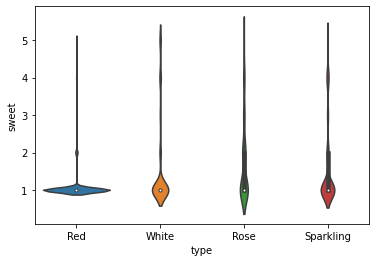

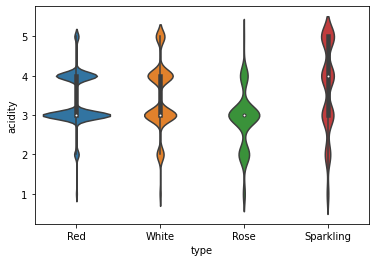

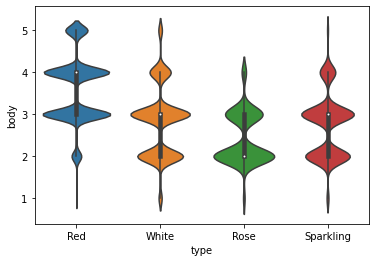

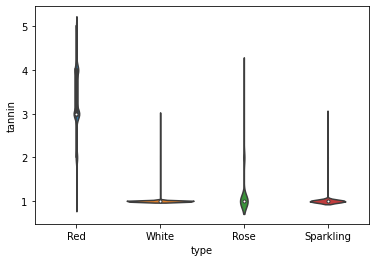

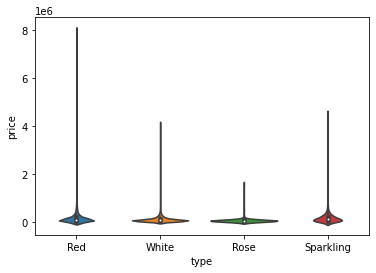

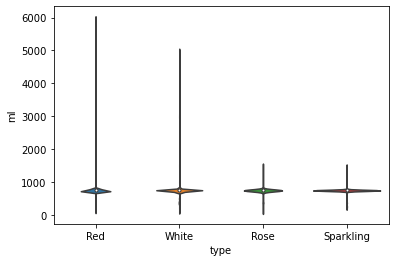

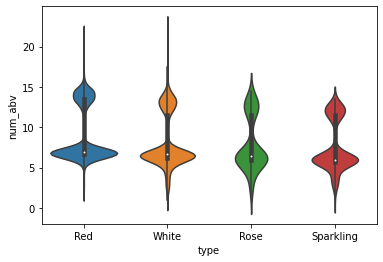

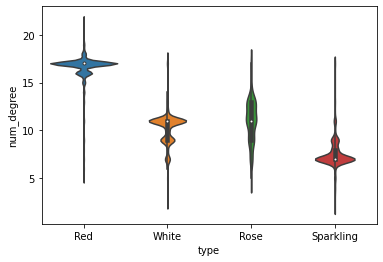

['sweet', 'acidity', 'body', 'tannin', 'price', 'ml', 'num_abv', 'num_degree']

In [35]:
for c in ['sweet','acidity', 'body', 'tannin', 'price', 'ml', 'num_abv','num_degree']:
    sns.violinplot(x="type", y=c,data=datanum)
    plt.show()
['sweet','acidity', 'body', 'tannin', 'price', 'ml', 'num_abv','num_degree']

In [36]:
#2.3.b
#droping num_degree because it has too many missing values and is almost perfectly correlated with type
datanum.drop(['num_degree'], axis = 1, inplace=True)

In [37]:
datanum.columns

Index(['id', 'name', 'producer', 'nation', 'varieties1', 'type', 'use',
       'sweet', 'acidity', 'body', 'tannin', 'price', 'year', 'ml', 'num_abv',
       'blend'],
      dtype='object')

In [38]:
datanum.nation.unique()

array(['칠레 Chile', '프랑스 France', '미국 U.S.A', '이탈리아 Italy', '독일 Germany',
       '스페인 Spain', '뉴질랜드 New Zealand', '호주 Australia', '아르헨티나 Argentina',
       '캐나다 Canada', '남아프리카 공화국 the Republic of South Africa',
       '그리스 Greece', '포르투갈 Portugal', '루마니아 Romania', '헝가리 Hungary',
       '레바논 Lebanon', '이스라엘 Israel', '오스트리아 Austria', '대한민국 Korea',
       '불가리아 Bulgaria', '일본 Japan', '조지아 Georgia', '영국 U.K',
       '우루과이 Uruguay', '슬로베니아 Slovenia', '아제르바이잔 Azerbaijan', '중국 China',
       '몰도바 Moldova', 'Grenache Blanc', 'Riesling', '크로아티아 Croatia',
       '스웨덴 Sweden'], dtype=object)

In [39]:
#2.3.g replace nation names with western name only
name_dict = {'칠레 Chile': 'Chile', '프랑스 France': 'France', '미국 U.S.A': 'U.S.A', '독일 Germany': 'Germany', 
             '스페인 Spain': 'Spain',
       '호주 Australia': 'Australia', '뉴질랜드 New Zealand': 'New Zealand', '이탈리아 Italy': 'Italy',
       '아르헨티나 Argentina': 'Argentina', '캐나다 Canada': 'Canada',
       '남아프리카 공화국 the Republic of South Africa': 'the Republic of South Africa', '포르투갈 Portugal': 'Portugal',
       '이스라엘 Israel': 'Israel', '헝가리 Hungary': 'Hungary', '루마니아 Romania': 'Romania',
       '오스트리아 Austria': 'Austria', '조지아 Georgia': 'Georgia', '대한민국 Korea': 'Korea',
        '불가리아 Bulgaria': 'Bulgaria', '우루과이 Uruguay': 'Uruguay',
       '그리스 Greece': 'Greece', '슬로베니아 Slovenia': 'Slovenia', '영국 U.K': 'U.K', '일본 Japan': 'Japan',
       '몰도바 Moldova': 'Moldova', '중국 China': 'China', '크로아티아 Croatia': 'Croatia', '레바논 Lebanon': 'Lebanon',
            '아제르바이잔 Azerbaijan': 'Azerbaijan', '스웨덴 Sweden':'Sweden', 'Grenache Blanc': 'Other', 'Riesling': 'Other'}

datanum = datanum.replace(name_dict)

In [40]:
datanum.nation.unique()

array(['Chile', 'France', 'U.S.A', 'Italy', 'Germany', 'Spain',
       'New Zealand', 'Australia', 'Argentina', 'Canada',
       'the Republic of South Africa', 'Greece', 'Portugal', 'Romania',
       'Hungary', 'Lebanon', 'Israel', 'Austria', 'Korea', 'Bulgaria',
       'Japan', 'Georgia', 'U.K', 'Uruguay', 'Slovenia', 'Azerbaijan',
       'China', 'Moldova', 'Other', 'Croatia', 'Sweden'], dtype=object)

In [41]:
#3.1Understanding price
#first filter only rows with price
price_num = datanum[datanum.price>0].copy()
#convert prices to GBP
price_num.loc[:,'price'] *=  0.00062

print(price_num.info())

price_num.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12315 entries, 0 to 21604
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          12315 non-null  int64  
 1   name        12315 non-null  object 
 2   producer    12315 non-null  object 
 3   nation      12315 non-null  object 
 4   varieties1  12156 non-null  object 
 5   type        12291 non-null  object 
 6   use         12310 non-null  object 
 7   sweet       12313 non-null  float64
 8   acidity     12315 non-null  float64
 9   body        12315 non-null  float64
 10  tannin      12315 non-null  float64
 11  price       12315 non-null  float64
 12  year        11030 non-null  float64
 13  ml          12259 non-null  float64
 14  num_abv     8274 non-null   float64
 15  blend       12315 non-null  int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 1.6+ MB
None


id               0
name             0
producer         0
nation           0
varieties1     159
type            24
use              5
sweet            2
acidity          0
body             0
tannin           0
price            0
year          1285
ml              56
num_abv       4041
blend            0
dtype: int64

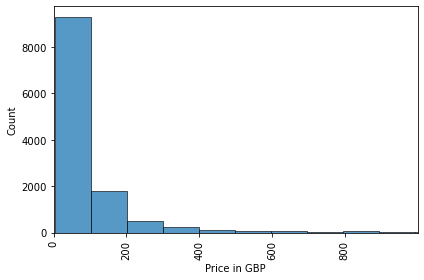

In [42]:
#3.1.i histogram
sns.histplot(data = price_num, x = 'price', bins = 50)
plt.xticks(range(0,1000,200), rotation = 90)
plt.xlim(0,1000)
plt.xlabel('Price in GBP')
plt.tight_layout()
plt.show()

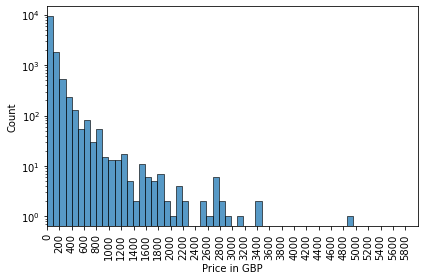

In [43]:
#3.1.ii histogram
sns.histplot(data = price_num, x = 'price', bins = 50)
plt.xticks(range(0,6000,200), rotation = 90)
plt.xlim(0,6000)
plt.xlabel('Price in GBP')
plt.yscale('log')
plt.tight_layout()
plt.show()

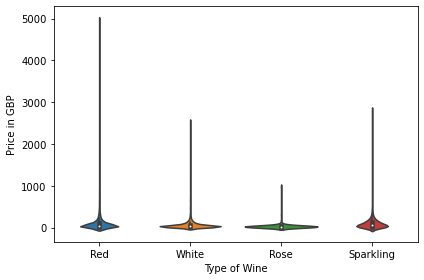

In [44]:
#3.2.b price by type
sns.violinplot(data = price_num, y = 'price', x = 'type')
plt.xticks(rotation = 0)
#plt.xlim(0,1000)
plt.ylabel('Price in GBP')
plt.xlabel('Type of Wine')
plt.tight_layout()
plt.show()

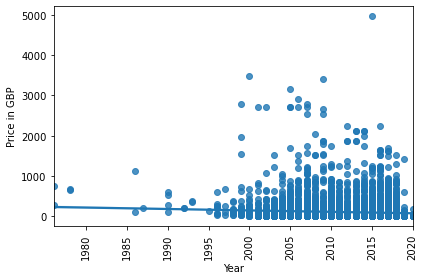

In [45]:
#3.2.b price by year

#clean rows without year
price_year = price_num[price_num.year > 0].copy()

price_year.describe()
sns.regplot(data = price_year, y = 'price', x = 'year', ci=95)
#sns.scatterplot(data = price_year, y = 'price', x = 'year', hue = 'type')
plt.xticks(rotation = 90)
#plt.xlim(0,1000)
plt.ylabel('Price in GBP')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

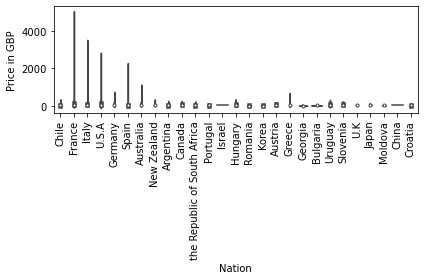

In [46]:

#3.1.d checking price distribution by nation
#sns.boxplot(data = price_year, y = 'price', x = 'nation')
sns.violinplot(data = price_num, y = 'price', x = 'nation')
#sns.scatterplot(data = price_year, y = 'price', x = 'year', hue = 'type')
plt.xticks(rotation = 90)
#plt.xlim(0,1000)
plt.ylabel('Price in GBP')
plt.xlabel('Nation')
plt.tight_layout()
plt.show()

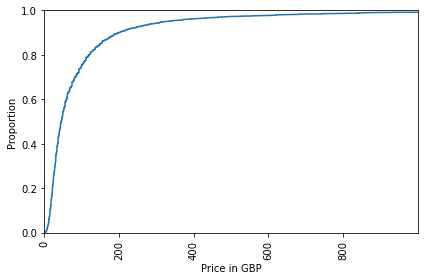

In [47]:
#ecdfplot

sns.ecdfplot(data = price_num, x = 'price')
plt.xticks(range(0,1000,200), rotation = 90)
plt.xlim(0,1000)
plt.xlabel('Price in GBP')
plt.tight_layout()
plt.show()

In [48]:
#3.2 Classification

# first, will convert price into a categorical variable for labelling (back to price_year set)
# before that, revising name of nations

In [49]:
#3.2.a
#convert price into a categorical variable for labelling (back to price_year set)

price_num.price.describe()

count    12315.000000
mean        99.539418
std        196.211502
min          2.418000
25%         24.800000
50%         45.880000
75%         99.200000
max       4960.000000
Name: price, dtype: float64

In [50]:
#3.2.a
#labelling price points
#Cheap: Will be the lowest 25% of wines (less than 27.28 GBP)=1
#Regular: Up to 75% of wines (27.28 < R < 102.92 GBP)=2
#For Expensive=3 and Very Expensive=4 cutoff, I used the Fig. 3.1 and defined a cutoff of 200 GBP.
price_num['price_label']=''
price_num.loc[price_num.price <= 102.92 ,'price_label'] = 2
price_num.loc[price_num.price < 27.28 ,'price_label'] = 1
price_num.loc[price_num.price > 102.92 ,'price_label'] = 3
price_num.loc[price_num.price > 200 ,'price_label'] = 4



In [51]:
price_num.head()

,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend,price_label
0,137197,Altair,알타이르 Altair,Chile,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,4.0,136.40,2014.0,750.0,14.50,1,3
1,137198,"Altair, Sideral",알타이르 Altair,Chile,Cabernet Sauvignon,Red,Table,1.0,3.0,4.0,4.0,68.20,2016.0,750.0,14.50,1,2
7,137204,"Calvet, Bordeaux Red",깔베 Calvet,France,Merlot,Red,Table,1.0,3.0,2.0,3.0,13.02,2011.0,750.0,13.50,1,1
8,137205,"Calvet, Bordeaux white",깔베 Calvet,France,Sauvignon blanc,White,Table,1.0,4.0,2.0,1.0,13.02,2010.0,750.0,5.75,1,1
9,137207,"Calvet, Varietals Cabernet Sauvignon",깔베 Calvet,France,Cabernet Sauvignon,Red,Table,1.0,3.0,2.0,3.0,11.78,2017.0,750.0,13.50,0,1


In [52]:
#3.2.a
#once created the labels, create a labels series, and drop price from main dataframe

p_labels = price_num['price_label']
no_price_num = price_num.drop(columns = ['price_label', 'price'])





In [53]:
#3.2.b
#also turning id into index (better late than never)
no_price_num.set_index('id', drop=True, inplace=True)

In [54]:
p_labels

0        3
1        2
7        1
8        1
9        1
        ..
21600    2
21601    1
21602    1
21603    1
21604    2
Name: price_label, Length: 12315, dtype: object

In [55]:
#3.3.b
#need to correct type "object"
p_labels = p_labels.astype('int')

In [56]:
p_labels

0        3
1        2
7        1
8        1
9        1
        ..
21600    2
21601    1
21602    1
21603    1
21604    2
Name: price_label, Length: 12315, dtype: int64

In [57]:
no_price_num.head()

,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,year,ml,num_abv,blend
id,,,,,,,,,,,,,,
137197,Altair,알타이르 Altair,Chile,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,4.0,2014.0,750.0,14.50,1
137198,"Altair, Sideral",알타이르 Altair,Chile,Cabernet Sauvignon,Red,Table,1.0,3.0,4.0,4.0,2016.0,750.0,14.50,1
137204,"Calvet, Bordeaux Red",깔베 Calvet,France,Merlot,Red,Table,1.0,3.0,2.0,3.0,2011.0,750.0,13.50,1
137205,"Calvet, Bordeaux white",깔베 Calvet,France,Sauvignon blanc,White,Table,1.0,4.0,2.0,1.0,2010.0,750.0,5.75,1
137207,"Calvet, Varietals Cabernet Sauvignon",깔베 Calvet,France,Cabernet Sauvignon,Red,Table,1.0,3.0,2.0,3.0,2017.0,750.0,13.50,0


In [58]:
no_price_num.describe()

,sweet,acidity,body,tannin,year,ml,num_abv,blend
count,12313.000000,12315.000000,12315.000000,12315.000000,11030.000000,12259.000000,8274.000000,12315.000000
mean,1.240884,3.417621,3.358831,2.514819,2012.391387,747.172200,8.901834,0.353715
std,0.786580,0.765250,0.888238,1.281420,4.922589,133.384382,3.464859,0.478141
min,1.000000,1.000000,1.000000,1.000000,1976.000000,100.000000,1.000000,0.000000
25%,1.000000,3.000000,3.000000,1.000000,2009.000000,750.000000,6.500000,0.000000
50%,1.000000,3.000000,3.000000,3.000000,2014.000000,750.000000,7.000000,0.000000
75%,1.000000,4.000000,4.000000,4.000000,2017.000000,750.000000,13.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,2020.000000,6000.000000,22.500000,1.000000


In [59]:
no_price_num.isna().sum()

name             0
producer         0
nation           0
varieties1     159
type            24
use              5
sweet            2
acidity          0
body             0
tannin           0
year          1285
ml              56
num_abv       4041
blend            0
dtype: int64

In [60]:
#3.3b
#filling na
#DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)[source]
no_price_num_fill= no_price_num.fillna(method= 'ffill', axis = 0)

In [61]:
no_price_num_fill.isna().sum()

name          0
producer      0
nation        0
varieties1    0
type          0
use           0
sweet         0
acidity       0
body          0
tannin        0
year          0
ml            0
num_abv       0
blend         0
dtype: int64

In [62]:
#3.2.b
#removing name first because it would map 1 on one with price
noname_noprice_num_fill = no_price_num_fill.drop(columns = ['name'])

In [63]:
#3.3.b
#one_hot_encoding
one_hot= pd.get_dummies(noname_noprice_num_fill, prefix=['producer', 'nation', 'varieties1', 'type', 'use'], prefix_sep='_', dummy_na=False,
                             columns=['producer', 'nation', 'varieties1', 'type', 'use'], sparse=False, drop_first=True, dtype=None)

In [64]:
one_hot.shape

(12315, 3429)

In [65]:
one_hot.isna().sum().sort_values(ascending = False)

sweet                                                       0
producer_오베하 네그라 Oveja Negra                                0
producer_오스본 Osborne                                        0
producer_오스토리아 Astoria                                      0
producer_오스트리안 빈티지 와인 Australian Vintage wine               0
                                                           ..
producer_보데가 인비오싸 라르 드 바로스 Bodegas Inviosa Lar de Barros    0
producer_보데가 일라나 Bodegas Illana                             0
producer_보데가 차크라 Bodega Chacra                              0
producer_보데가 치비떼 Bodegas Chivite                            0
use_Table, Etc                                              0
Length: 3429, dtype: int64

In [66]:
#3.3.b
#scaling data

from sklearn.preprocessing import scale
scaled_one_hot = pd.DataFrame(scale(one_hot))

In [67]:
scaled_one_hot.shape

(12315, 3429)

In [68]:
#It looks like there are no principal components, each field explaining just a little of price variation.
#will try classifying without dim rec
#3.2.c
from sklearn import metrics
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(scaled_one_hot, p_labels, test_size = .3)

In [69]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(8620, 3429) (3695, 3429) (8620,) (3695,)


In [70]:
#3.2.d
#i. Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
predict = model.predict(X_test)

print("confusion matrix")
print(sklearn.metrics.confusion_matrix(predict, Y_test))

print("Classification Report")
print(sklearn.metrics.classification_report(predict, Y_test))

confusion matrix
[[ 741  276    8    3]
 [ 265 1336  224   50]
 [   6  156  183  106]
 [   2   42   99  198]]
Classification Report
              precision    recall  f1-score   support

           1       0.73      0.72      0.73      1028
           2       0.74      0.71      0.73      1875
           3       0.36      0.41      0.38       451
           4       0.55      0.58      0.57       341

    accuracy                           0.67      3695
   macro avg       0.59      0.60      0.60      3695
weighted avg       0.67      0.67      0.67      3695



In [71]:

#3.2.d
#ii. K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predict = model.predict(X_test)

print("confusion matrix")
print(sklearn.metrics.confusion_matrix(predict, Y_test))

print("Classification Report")
print(sklearn.metrics.classification_report(predict, Y_test))

print(model.get_params())

confusion matrix
[[ 826 1053  253  123]
 [ 187  670  139   67]
 [   1   59   82   51]
 [   0   28   40  116]]
Classification Report
              precision    recall  f1-score   support

           1       0.81      0.37      0.51      2255
           2       0.37      0.63      0.47      1063
           3       0.16      0.42      0.23       193
           4       0.32      0.63      0.43       184

    accuracy                           0.46      3695
   macro avg       0.42      0.51      0.41      3695
weighted avg       0.63      0.46      0.48      3695

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [72]:
#3.2.d
#iii. Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predict = model.predict(X_test)

print("confusion matrix")
print(sklearn.metrics.confusion_matrix(predict, Y_test))

print("Classification Report")
print(sklearn.metrics.classification_report(predict, Y_test))

print(model.get_params())

confusion matrix
[[ 653  342   21    2]
 [ 345 1248  244   95]
 [  13  164  155   84]
 [   3   56   94  176]]
Classification Report
              precision    recall  f1-score   support

           1       0.64      0.64      0.64      1018
           2       0.69      0.65      0.67      1932
           3       0.30      0.37      0.33       416
           4       0.49      0.53      0.51       329

    accuracy                           0.60      3695
   macro avg       0.53      0.55      0.54      3695
weighted avg       0.62      0.60      0.61      3695

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [73]:
#3.2.d
#iv. Naïve Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
predict = model.predict(X_test)

print("confusion matrix")
print(sklearn.metrics.confusion_matrix(predict, Y_test))

print("Classification Report")
print(sklearn.metrics.classification_report(predict, Y_test))

print(model.get_params())

confusion matrix
[[711 384  27   3]
 [ 66 607  81  15]
 [107 384 166  71]
 [130 435 240 268]]
Classification Report
              precision    recall  f1-score   support

           1       0.70      0.63      0.66      1125
           2       0.34      0.79      0.47       769
           3       0.32      0.23      0.27       728
           4       0.75      0.25      0.37      1073

    accuracy                           0.47      3695
   macro avg       0.53      0.47      0.44      3695
weighted avg       0.56      0.47      0.46      3695

{'priors': None, 'var_smoothing': 1e-09}


In [74]:
#3.3 regression of price against intrinsic qualities (back to price_num dataframe)

price_num.head()

,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend,price_label
0,137197,Altair,알타이르 Altair,Chile,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,4.0,136.40,2014.0,750.0,14.50,1,3
1,137198,"Altair, Sideral",알타이르 Altair,Chile,Cabernet Sauvignon,Red,Table,1.0,3.0,4.0,4.0,68.20,2016.0,750.0,14.50,1,2
7,137204,"Calvet, Bordeaux Red",깔베 Calvet,France,Merlot,Red,Table,1.0,3.0,2.0,3.0,13.02,2011.0,750.0,13.50,1,1
8,137205,"Calvet, Bordeaux white",깔베 Calvet,France,Sauvignon blanc,White,Table,1.0,4.0,2.0,1.0,13.02,2010.0,750.0,5.75,1,1
9,137207,"Calvet, Varietals Cabernet Sauvignon",깔베 Calvet,France,Cabernet Sauvignon,Red,Table,1.0,3.0,2.0,3.0,11.78,2017.0,750.0,13.50,0,1


In [75]:
price_intrinsic = price_num[['varieties1', 'type',
       'sweet', 'acidity', 'body', 'tannin', 'price', 'num_abv',
       'blend']]

In [76]:
price_intrinsic.head()

,varieties1,type,sweet,acidity,body,tannin,price,num_abv,blend
0,Cabernet Sauvignon,Red,1.0,4.0,5.0,4.0,136.40,14.50,1
1,Cabernet Sauvignon,Red,1.0,3.0,4.0,4.0,68.20,14.50,1
7,Merlot,Red,1.0,3.0,2.0,3.0,13.02,13.50,1
8,Sauvignon blanc,White,1.0,4.0,2.0,1.0,13.02,5.75,1
9,Cabernet Sauvignon,Red,1.0,3.0,2.0,3.0,11.78,13.50,0


In [77]:
price_intrinsic.shape

(12315, 9)

In [78]:
price_intrinsic.isna().sum()

varieties1     159
type            24
sweet            2
acidity          0
body             0
tannin           0
price            0
num_abv       4041
blend            0
dtype: int64

In [79]:
#drop rows with na
price_intrinsic_drop = price_intrinsic.dropna(axis=0)

#fills na
price_intrinsic_fill = price_intrinsic.fillna(method='ffill')

In [80]:
#one hot encode varieties1 and type

#one_hot_encoding
intrinsic_one_hot_drop = pd.get_dummies(price_intrinsic_drop, prefix=['varieties1', 'type'], prefix_sep='_', dummy_na=False,
                             columns=['varieties1', 'type'], drop_first=True, dtype=None)


intrinsic_one_hot_fill = pd.get_dummies(price_intrinsic_fill, prefix=['varieties1', 'type'], prefix_sep='_', dummy_na=False,
                             columns=['varieties1', 'type'], drop_first=True, dtype=None)

In [81]:
intrinsic_one_hot_drop.describe()

,sweet,acidity,body,tannin,price,num_abv,blend,varieties1_Aglianico,varieties1_Airen,varieties1_Albarino,...,varieties1_Xinomavro,varieties1_Yellow Muscat,varieties1_Zelen,varieties1_Zibibbo,varieties1_Zinfandel,varieties1_Zweigelt,varieties1_mourvedre,type_Rose,type_Sparkling,type_White
count,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,...,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000,8173.000000
mean,1.273461,3.336963,3.369632,2.567234,81.030377,8.907644,0.386272,0.002447,0.002202,0.000367,...,0.001591,0.000122,0.000245,0.000367,0.010767,0.000734,0.000856,0.015172,0.081243,0.248624
std,0.830304,0.753358,0.904680,1.292525,146.238578,3.459935,0.486924,0.049410,0.046881,0.019157,...,0.039853,0.011061,0.015642,0.019157,0.103211,0.027086,0.029255,0.122244,0.273225,0.432242
min,1.000000,1.000000,1.000000,1.000000,2.418000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,1.000000,24.180000,6.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,3.000000,3.000000,40.920000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,4.000000,4.000000,84.940000,13.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,4960.000000,22.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
intrinsic_one_hot_fill.describe()

,sweet,acidity,body,tannin,price,num_abv,blend,varieties1_Aglianico,varieties1_Airen,varieties1_Albarino,...,varieties1_Xinomavro,varieties1_Yellow Muscat,varieties1_Zelen,varieties1_Zibibbo,varieties1_Zinfandel,varieties1_Zweigelt,varieties1_mourvedre,type_Rose,type_Sparkling,type_White
count,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,...,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000,12315.000000
mean,1.240926,3.417621,3.358831,2.514819,99.539418,9.106340,0.353715,0.001868,0.001786,0.000487,...,0.001056,0.000081,0.000244,0.000244,0.010069,0.000974,0.000731,0.015104,0.086317,0.252700
std,0.786549,0.765250,0.888238,1.281420,196.211502,3.555451,0.478141,0.043178,0.042230,0.022068,...,0.032475,0.009011,0.015607,0.015607,0.099842,0.031202,0.027025,0.121970,0.280844,0.434578
min,1.000000,1.000000,1.000000,1.000000,2.418000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,3.000000,1.000000,24.800000,6.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,3.000000,3.000000,45.880000,7.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,4.000000,4.000000,99.200000,13.500000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,4960.000000,22.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
#separating price series

price_drop = intrinsic_one_hot_drop['price']
price_fill = intrinsic_one_hot_fill['price']

intrinsic_one_hot_drop.drop(columns = ['price'], inplace = True)
intrinsic_one_hot_fill.drop(columns = ['price'], inplace = True)

In [84]:
#regression itself

from sklearn import linear_model

reg1 = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

In [85]:
#fit the models
reg1.fit(intrinsic_one_hot_drop, price_drop)

reg2.fit(intrinsic_one_hot_fill, price_fill)

LinearRegression()

In [86]:
#make predictions for scoring

price_pred_drop = reg1.predict(intrinsic_one_hot_drop)

price_pred_fill = reg2.predict(intrinsic_one_hot_fill)

In [87]:
explained_drop = sklearn.metrics.r2_score(price_drop, price_pred_drop)

explained_fill = sklearn.metrics.r2_score(price_fill, price_pred_fill)

In [88]:
print(explained_drop)
print(explained_fill)

0.19307722040252095
0.16794107172770356


In [89]:
#4.1 preprocess dataset for clustering. 
#Since we wont use price anymore, we can return to the whole dataset (datanum)

datanum.describe()

,id,sweet,acidity,body,tannin,price,year,ml,num_abv,blend
count,21314.000000,21312.000000,21301.000000,21301.000000,21301.000000,1.231500e+04,18950.000000,21189.000000,14201.000000,21314.000000
mean,153993.519705,1.243994,3.400498,3.319985,2.504155,1.605474e+05,2012.216095,748.996319,8.683960,0.347846
std,9193.543305,0.784129,0.760540,0.885220,1.257781,3.164702e+05,4.928697,131.723106,3.362585,0.476298
min,137197.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+03,1967.000000,100.000000,1.000000,0.000000
25%,146663.250000,1.000000,3.000000,3.000000,1.000000,4.000000e+04,2009.000000,750.000000,6.500000,0.000000
50%,153721.500000,1.000000,3.000000,3.000000,3.000000,7.400000e+04,2013.000000,750.000000,7.000000,0.000000
75%,162434.750000,1.000000,4.000000,4.000000,3.000000,1.600000e+05,2016.000000,750.000000,12.500000,1.000000
max,168707.000000,5.000000,5.000000,5.000000,5.000000,8.000000e+06,2020.000000,6000.000000,22.500000,1.000000


In [90]:
datanum.isna().sum()

id               0
name             0
producer         0
nation           0
varieties1     335
type            58
use             11
sweet            2
acidity         13
body            13
tannin          13
price         8999
year          2364
ml             125
num_abv       7113
blend            0
dtype: int64

In [91]:
#separete columns with  intrinsic attributes for classification, 
#drop na in order to have a complete set of attributes
intrinsic_datanum = datanum[['id', 'varieties1', 'type',
       'sweet', 'acidity', 'body', 'tannin', 'num_abv',
       'blend']].dropna(axis=0)

intrinsic_datanum2 = datanum[['id', 'type',
       'sweet', 'acidity', 'body', 'tannin', 'num_abv',
       'blend']].dropna(axis=0)

In [92]:
#drop na in order to have a complete set of attributes
intrinsic_datanum.isna().sum()

id            0
varieties1    0
type          0
sweet         0
acidity       0
body          0
tannin        0
num_abv       0
blend         0
dtype: int64

In [93]:
print(intrinsic_datanum.head())
print(intrinsic_datanum.shape)

       id          varieties1   type  sweet  acidity  body  tannin  num_abv  \
0  137197  Cabernet Sauvignon    Red    1.0      4.0   5.0     4.0     14.5   
1  137198  Cabernet Sauvignon    Red    1.0      3.0   4.0     4.0     14.5   
2  137199            Carignan    Red    2.0      3.0   2.0     2.0     11.5   
3  137200            Carignan  White    1.0      3.0   2.0     1.0     11.5   
4  137201  Cabernet Sauvignon    Red    1.0      3.0   3.0     4.0     13.5   

   blend  
0      1  
1      1  
2      1  
3      1  
4      0  
(13967, 9)


In [94]:
#separating and preserving id to link with original dataset information (name, producer, nation, etc)
intrinsic_id = intrinsic_datanum['id']
intrinsic_id2 = intrinsic_datanum2['id']

intrinsic_datanum.drop(columns='id', inplace=True)
intrinsic_datanum2.drop(columns='id', inplace=True)

In [95]:
print(intrinsic_id.shape)

(13967,)


In [96]:
#one hot encoding
#one_hot_encoding
intrinsic_one_hot_data = pd.get_dummies(intrinsic_datanum, prefix=['varieties1', 'type'], prefix_sep='_', dummy_na=False,
                             columns=['varieties1', 'type'], drop_first=True, dtype=None)

intrinsic_one_hot_data2 = pd.get_dummies(intrinsic_datanum2, prefix=['type'], prefix_sep='_', dummy_na=False,
                             columns=['type'], drop_first=True, dtype=None)


In [97]:
print(intrinsic_one_hot_data.shape)


(13967, 314)


In [98]:
#scaling
scaled_intrinsic_one_hot_data = pd.DataFrame(scale(intrinsic_one_hot_data))
print(scaled_intrinsic_one_hot_data.shape)

scaled_intrinsic_one_hot_data2 = pd.DataFrame(scale(intrinsic_one_hot_data2))
print(scaled_intrinsic_one_hot_data2.shape)

(13967, 314)
(14152, 9)


In [99]:
scaled_intrinsic_one_hot_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
count,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,...,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04,1.396700e+04
mean,-8.694508e-16,-3.320177e-16,3.274192e-16,3.726763e-16,-6.044615e-15,-2.222417e-15,3.457663e-16,-1.922233e-16,-1.600436e-15,-7.806656e-16,...,-1.455516e-15,-1.793309e-15,1.738337e-15,5.678772e-16,3.710845e-16,1.971043e-15,2.458466e-16,8.447456e-16,1.637855e-15,-7.412430e-16
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,...,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-3.330082e-01,-3.096678e+00,-2.599788e+00,-1.219104e+00,-2.288767e+00,-7.837786e-01,-5.425987e-02,-5.223142e-02,-8.461824e-03,-1.692547e-02,...,-3.052266e-02,-8.461824e-03,-1.196725e-02,-1.465736e-02,-9.989509e-02,-2.932417e-02,-3.971935e-02,-1.285345e-01,-2.787483e-01,-5.816769e-01
25%,-3.330082e-01,-4.444443e-01,-3.712160e-01,-1.219104e+00,-6.502572e-01,-7.837786e-01,-5.425987e-02,-5.223142e-02,-8.461824e-03,-1.692547e-02,...,-3.052266e-02,-8.461824e-03,-1.196725e-02,-1.465736e-02,-9.989509e-02,-2.932417e-02,-3.971935e-02,-1.285345e-01,-2.787483e-01,-5.816769e-01
50%,-3.330082e-01,-4.444443e-01,-3.712160e-01,3.545040e-01,-5.013018e-01,-7.837786e-01,-5.425987e-02,-5.223142e-02,-8.461824e-03,-1.692547e-02,...,-3.052266e-02,-8.461824e-03,-1.196725e-02,-1.465736e-02,-9.989509e-02,-2.932417e-02,-3.971935e-02,-1.285345e-01,-2.787483e-01,-5.816769e-01
75%,-3.330082e-01,8.816726e-01,7.430702e-01,1.141308e+00,1.137208e+00,1.275871e+00,-5.425987e-02,-5.223142e-02,-8.461824e-03,-1.692547e-02,...,-3.052266e-02,-8.461824e-03,-1.196725e-02,-1.465736e-02,-9.989509e-02,-2.932417e-02,-3.971935e-02,-1.285345e-01,-2.787483e-01,1.719167e+00
max,4.522029e+00,2.207790e+00,1.857356e+00,1.928112e+00,4.116316e+00,1.275871e+00,1.842983e+01,1.914556e+01,1.181778e+02,5.908257e+01,...,3.276255e+01,1.181778e+02,8.356135e+01,6.822512e+01,1.001050e+01,3.410156e+01,2.517665e+01,7.780015e+00,3.587466e+00,1.719167e+00


In [100]:
#4.1.a
#agglomerative clustering 4 clusters, dataset including varieties1

model1 = cluster.AgglomerativeClustering(n_clusters=4, linkage="average", affinity="cityblock", compute_distances = True)
model1.fit(scaled_intrinsic_one_hot_data)

AgglomerativeClustering(affinity='cityblock', compute_distances=True,
                        linkage='average', n_clusters=4)

In [101]:
print('Model used:')
print(model1)
print()
print("Silhouette score:", metrics.silhouette_score(scaled_intrinsic_one_hot_data, model1.labels_))
print()
print('Distribution of labels:')
bb=model1.labels_
aa=pd.DataFrame(bb).value_counts()
print(aa)

Model used:
AgglomerativeClustering(affinity='cityblock', compute_distances=True,
                        linkage='average', n_clusters=4)

Silhouette score: 0.8665303371798027

Distribution of labels:
0    13964
1        1
2        1
3        1
dtype: int64


In [102]:
#4.1.a
#agglomerative clustering jaccard distance

model2 = cluster.AgglomerativeClustering(n_clusters=4, linkage="average", affinity="jaccard", compute_distances = True)
model2.fit(scaled_intrinsic_one_hot_data)

AgglomerativeClustering(affinity='jaccard', compute_distances=True,
                        linkage='average', n_clusters=4)

In [103]:
print('Model used:')
print(model2)
print()
print("Silhouette score:", metrics.silhouette_score(scaled_intrinsic_one_hot_data, model2.labels_))
print()
print('Distribution of labels:')
bb=model2.labels_
aa=pd.DataFrame(bb).value_counts()
print(aa)

Model used:
AgglomerativeClustering(affinity='jaccard', compute_distances=True,
                        linkage='average', n_clusters=4)

Silhouette score: 0.17872802386979764

Distribution of labels:
0    9140
1    3756
2     890
3     181
dtype: int64


In [104]:
#4.1.a
#agglomerative clustering kulsinski distance
model3 = cluster.AgglomerativeClustering(n_clusters=4, linkage="average", affinity="kulsinski", compute_distances = True)
model3.fit(scaled_intrinsic_one_hot_data)


AgglomerativeClustering(affinity='kulsinski', compute_distances=True,
                        linkage='average', n_clusters=4)

In [105]:
print('Model used:')
print(model3)
print()
print("Silhouette score:", metrics.silhouette_score(scaled_intrinsic_one_hot_data, model3.labels_))
print()
print('Distribution of labels:')
bb=model3.labels_
aa=pd.DataFrame(bb).value_counts()
print(aa)

Model used:
AgglomerativeClustering(affinity='kulsinski', compute_distances=True,
                        linkage='average', n_clusters=4)

Silhouette score: -0.398227232498772

Distribution of labels:
0    13964
1        1
2        1
3        1
dtype: int64


In [106]:
#4.1.a
#kmeans 4 clusters
model4 = cluster.KMeans(4)
model4.fit(scaled_intrinsic_one_hot_data)

KMeans(n_clusters=4)

In [107]:
print('Model used:')
print(model4)
print()
print("Silhouette score:", metrics.silhouette_score(scaled_intrinsic_one_hot_data, model4.labels_))
print()
print('Distribution of labels:')
bb=model4.labels_
aa=pd.DataFrame(bb).value_counts()
print(aa)

Model used:
KMeans(n_clusters=4)

Silhouette score: -0.0326118438271332

Distribution of labels:
2    9154
1    4612
0     192
3       9
dtype: int64


In [109]:
#trying to understand clusters

d_intrinsic_id2 = pd.DataFrame(intrinsic_id)

d_intrinsic_id2['label2'] = model2.labels_
d_intrinsic_id2['label4'] = model4.labels_


#check_clusters2 = datanum.join(intrinsic_id, on = id, how = 'right')

print(datanum.columns)


Index(['id', 'name', 'producer', 'nation', 'varieties1', 'type', 'use',
       'sweet', 'acidity', 'body', 'tannin', 'price', 'year', 'ml', 'num_abv',
       'blend'],
      dtype='object')


<AxesSubplot:xlabel='year', ylabel='type'>

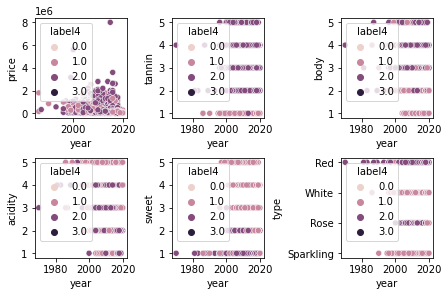

<Figure size 576x288 with 0 Axes>

In [110]:
sns.color_palette("bright")
model = 'model 4'
fig, axes = plt.subplots(2, 3, constrained_layout = True)

plt.figure(figsize=(8,4))

#plt.tight_layout()

sns.scatterplot(ax=axes[0,0], data=datanum, y = 'price', x = 'year', hue = d_intrinsic_id2['label4'])

sns.scatterplot(ax=axes[0,1], data=datanum, y = 'tannin', x = 'year', hue = d_intrinsic_id2['label4'])

sns.scatterplot(ax=axes[0,2],data=datanum, y = 'body', x = 'year', hue = d_intrinsic_id2['label4'])

sns.scatterplot(ax=axes[1,0],data=datanum, y = 'acidity', x = 'year', hue = d_intrinsic_id2['label4'])

sns.scatterplot(ax=axes[1,1],data=datanum, y = 'sweet', x = 'year', hue = d_intrinsic_id2['label4'])


sns.scatterplot(ax=axes[1,2],data=datanum, y = 'type', x = 'year', hue = d_intrinsic_id2['label4'])


<AxesSubplot:xlabel='year', ylabel='type'>

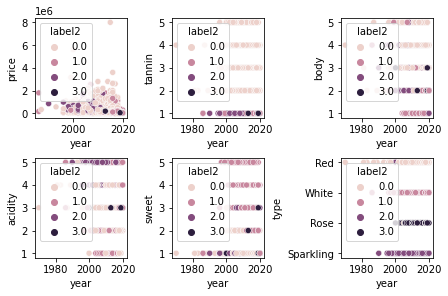

<Figure size 576x288 with 0 Axes>

In [111]:
sns.color_palette("bright")
model = 'model 2'
fig, axes = plt.subplots(2, 3, constrained_layout = True)

plt.figure(figsize=(8,4))

#plt.tight_layout()

sns.scatterplot(ax=axes[0,0], data=datanum, y = 'price', x = 'year', hue = d_intrinsic_id2['label2'])

sns.scatterplot(ax=axes[0,1], data=datanum, y = 'tannin', x = 'year', hue = d_intrinsic_id2['label2'])

sns.scatterplot(ax=axes[0,2],data=datanum, y = 'body', x = 'year', hue = d_intrinsic_id2['label2'])

sns.scatterplot(ax=axes[1,0],data=datanum, y = 'acidity', x = 'year', hue = d_intrinsic_id2['label2'])

sns.scatterplot(ax=axes[1,1],data=datanum, y = 'sweet', x = 'year', hue = d_intrinsic_id2['label2'])


sns.scatterplot(ax=axes[1,2],data=datanum, y = 'type', x = 'year', hue = d_intrinsic_id2['label2'])

In [112]:
print(datanum.loc[6831,:])

id                         148412
name          Madrone, Chardonnay
producer              마드론 Madrone
nation                      U.S.A
varieties1             Chardonnay
type                        White
use                         Table
sweet                         1.0
acidity                       3.0
body                          3.0
tannin                        1.0
price                         NaN
year                       2007.0
ml                          750.0
num_abv                       6.0
blend                           0
Name: 6831, dtype: object


In [113]:
#4.2 creating recommender system
datanum.info()
datanum.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21314 entries, 0 to 21604
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          21314 non-null  int64  
 1   name        21314 non-null  object 
 2   producer    21314 non-null  object 
 3   nation      21314 non-null  object 
 4   varieties1  20979 non-null  object 
 5   type        21256 non-null  object 
 6   use         21303 non-null  object 
 7   sweet       21312 non-null  float64
 8   acidity     21301 non-null  float64
 9   body        21301 non-null  float64
 10  tannin      21301 non-null  float64
 11  price       12315 non-null  float64
 12  year        18950 non-null  float64
 13  ml          21189 non-null  float64
 14  num_abv     14201 non-null  float64
 15  blend       21314 non-null  int64  
dtypes: float64(8), int64(2), object(6)
memory usage: 3.3+ MB


Index(['id', 'name', 'producer', 'nation', 'varieties1', 'type', 'use',
       'sweet', 'acidity', 'body', 'tannin', 'price', 'year', 'ml', 'num_abv',
       'blend'],
      dtype='object')

In [114]:
#4.2 creating recommender system
sensory = datanum[['id', 'type','sweet', 'acidity', 'body', 'tannin', 'num_abv']].copy()

In [115]:
#4.2.a creating type labels
sensory.loc[sensory.type == 'Sparkling', ['type']] = 0
sensory.loc[sensory.type == 'White', ['type']] = 1
sensory.loc[sensory.type == 'Rose', ['type']] = 2
sensory.loc[sensory.type == 'Red', ['type']] = 3



In [116]:
sensory.set_index('id')

,type,sweet,acidity,body,tannin,num_abv
id,,,,,,
137197,3,1.0,4.0,5.0,4.0,14.5
137198,3,1.0,3.0,4.0,4.0,14.5
137199,3,2.0,3.0,2.0,2.0,11.5
137200,1,1.0,3.0,2.0,1.0,11.5
137201,3,1.0,3.0,3.0,4.0,13.5
...,...,...,...,...,...,...
168703,0,1.0,5.0,2.0,1.0,NaN
168704,0,1.0,5.0,2.0,1.0,12.5
168705,2,1.0,3.0,2.0,1.0,12.5


In [117]:
sensory.describe()

,id,sweet,acidity,body,tannin,num_abv
count,21314.000000,21312.000000,21301.000000,21301.000000,21301.000000,14201.000000
mean,153993.519705,1.243994,3.400498,3.319985,2.504155,8.683960
std,9193.543305,0.784129,0.760540,0.885220,1.257781,3.362585
min,137197.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,146663.250000,1.000000,3.000000,3.000000,1.000000,6.500000
50%,153721.500000,1.000000,3.000000,3.000000,3.000000,7.000000
75%,162434.750000,1.000000,4.000000,4.000000,3.000000,12.500000
max,168707.000000,5.000000,5.000000,5.000000,5.000000,22.500000


In [118]:
sensory.id.nunique()

21314

In [119]:
#4.2.b counting nans
print('Missing values in sensory DataFrame:')
print('sensory.isna().sum()')
sensory.isna().sum()

Missing values in sensory DataFrame:
sensory.isna().sum()


id            0
type         58
sweet         2
acidity      13
body         13
tannin       13
num_abv    7113
dtype: int64

In [120]:
#4.2.b imputing missing values

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
sensory_imp = imputer.fit_transform(sensory)

In [121]:
sensory_imp = pd.DataFrame(sensory_imp, columns = sensory.columns)

In [122]:
sensory_imp.head()

,id,type,sweet,acidity,body,tannin,num_abv
0,137197.0,3.0,1.0,4.0,5.0,4.0,14.5
1,137198.0,3.0,1.0,3.0,4.0,4.0,14.5
2,137199.0,3.0,2.0,3.0,2.0,2.0,11.5
3,137200.0,1.0,1.0,3.0,2.0,1.0,11.5
4,137201.0,3.0,1.0,3.0,3.0,4.0,13.5


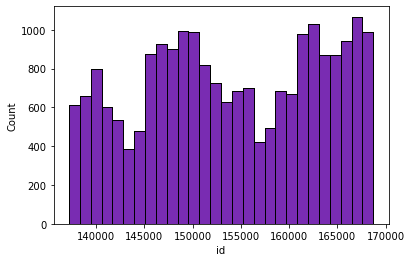

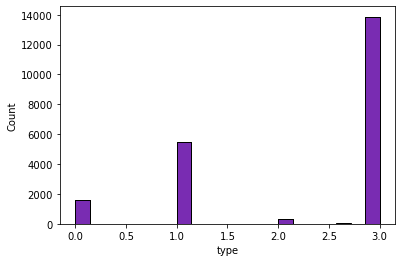

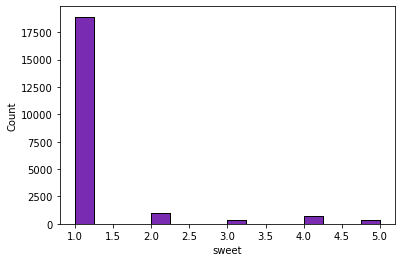

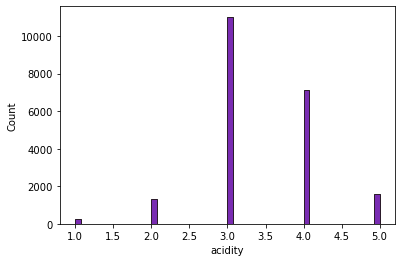

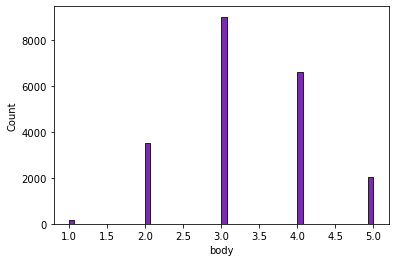

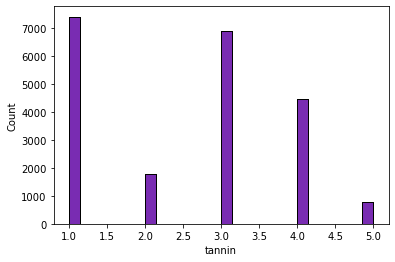

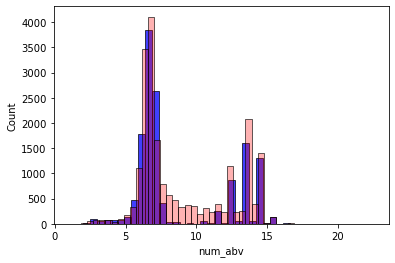

In [123]:
#verifying quality of imputations
for f in sensory.columns:
    sns.histplot(data = sensory, x = f, color = 'Blue')
    sns.histplot(data = sensory_imp, x = f, color = 'Red', alpha = 0.3)
    plt.show()

In [124]:
sensory_imp.isna().sum()

id         0
type       0
sweet      0
acidity    0
body       0
tannin     0
num_abv    0
dtype: int64

In [125]:
#converting prices to GBP (previous conversion was applied in "price_num dataframe")
datanum.loc[:,'price'] *=  0.00062

In [126]:
print(sensory_imp.head())

         id  type  sweet  acidity  body  tannin  num_abv
0  137197.0   3.0    1.0      4.0   5.0     4.0     14.5
1  137198.0   3.0    1.0      3.0   4.0     4.0     14.5
2  137199.0   3.0    2.0      3.0   2.0     2.0     11.5
3  137200.0   1.0    1.0      3.0   2.0     1.0     11.5
4  137201.0   3.0    1.0      3.0   3.0     4.0     13.5


In [127]:
#creating Id series from sensory_imp (will be lost after scaling)
sensory_imp_ids = sensory_imp.id
sensory_imp.drop(columns = ['id'], inplace = True)


In [128]:
print(sensory_imp_ids.head())
print(sensory_imp.head())

0    137197.0
1    137198.0
2    137199.0
3    137200.0
4    137201.0
Name: id, dtype: float64
   type  sweet  acidity  body  tannin  num_abv
0   3.0    1.0      4.0   5.0     4.0     14.5
1   3.0    1.0      3.0   4.0     4.0     14.5
2   3.0    2.0      3.0   2.0     2.0     11.5
3   1.0    1.0      3.0   2.0     1.0     11.5
4   3.0    1.0      3.0   3.0     4.0     13.5


In [129]:
row = sensory_imp_ids.loc[sensory_imp_ids == 137201].index[0]

print(row)

4


In [130]:
#scaling
#sensory_imp = pd.DataFrame(sensory_imp, columns = sensory.columns)
sensory_imp_scaled = pd.DataFrame(scale(sensory_imp), columns = sensory_imp.columns)

In [131]:
sensory_imp_scaled.describe()

,type,sweet,acidity,body,tannin,num_abv
count,2.131400e+04,2.131400e+04,2.131400e+04,2.131400e+04,2.131400e+04,2.131400e+04
mean,2.131351e-14,7.821608e-15,-2.228228e-15,-2.693648e-15,1.043545e-14,-7.493453e-15
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.096764e+00,-3.111922e-01,-3.157120e+00,-2.621164e+00,-1.195771e+00,-2.516755e+00
25%,-1.162818e+00,-3.111922e-01,-5.269065e-01,-3.612712e-01,-1.195771e+00,-7.801546e-01
50%,7.050734e-01,-3.111922e-01,-5.269065e-01,-3.612712e-01,3.946206e-01,-5.433454e-01
75%,7.050734e-01,-3.111922e-01,7.882003e-01,7.686754e-01,3.946206e-01,1.114319e+00
max,7.050734e-01,4.790335e+00,2.103307e+00,1.898622e+00,1.985012e+00,4.271775e+00


In [132]:
#4.2.c creating a recommendation system: Create distance matrices
#possible distance metrics ‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’

dist_mat_manhattan = sklearn.metrics.pairwise_distances(sensory_imp_scaled, Y=None, metric='manhattan')
dist_mat_euclidean = sklearn.metrics.pairwise_distances(sensory_imp_scaled, Y=None, metric='euclidean')
dist_mat_cosine = sklearn.metrics.pairwise_distances(sensory_imp_scaled, Y=None, metric='cosine')


In [133]:
dist_mat_manhattan

array([[ 0.        ,  2.44505335,  8.51795606, ...,  8.6559701 ,
         9.58991584, 10.3925326 ],
       [ 2.44505335,  0.        ,  6.07290272, ...,  6.21091676,
         7.1448625 ,  7.94747925],
       [ 8.51795606,  6.07290272,  0.        , ...,  3.32026864,
         4.25421438,  4.13446961],
       ...,
       [ 8.6559701 ,  6.21091676,  3.32026864, ...,  0.        ,
         0.93394574,  3.99645557],
       [ 9.58991584,  7.1448625 ,  4.25421438, ...,  0.93394574,
         0.        ,  4.93040131],
       [10.3925326 ,  7.94747925,  4.13446961, ...,  3.99645557,
         4.93040131,  0.        ]])

In [134]:
#4.2.c
#returns n most similar wines for each distance measure
def closest_wines(row, n):
    own_dist_manhattan = list(dist_mat_manhattan[row])
    own_dist_euclidean = list(dist_mat_euclidean[row])
    own_dist_cosine = list(dist_mat_cosine[row])
    
    with_row_manhattan = pd.DataFrame(own_dist_manhattan)
    with_row_euclidean = pd.DataFrame(own_dist_euclidean)
    with_row_cosine = pd.DataFrame(own_dist_cosine)
    
    with_row_manhattan.sort_values(by=0,ascending=True, inplace=True)
    with_row_euclidean.sort_values(by=0,ascending=True, inplace=True)
    with_row_cosine.sort_values(by=0,ascending=True, inplace=True)

    return list(with_row_manhattan[0:n+1].index.values), list(with_row_euclidean[0:n+1].index.values), list(with_row_cosine[0:n+1].index.values)

In [135]:
m, e, c = closest_wines(0,10)
print(m)

[0, 16343, 19268, 1885, 19287, 12376, 16293, 19290, 19351, 4641, 6408]


In [136]:
#4.2.c
#function that returns similar wines to the one entered (using id)
def similar_wines(wine_id, n):
        #get row number from requested id
        row = sensory_imp_ids.loc[sensory_imp_ids == wine_id].index[0]
        
        #parse target wine information
        target = datanum.loc[datanum.id == wine_id, :]
        
        #find neighbors
        m,e,c = closest_wines(row, n)
        
        #print information
        print("Most similar wines to ", target[['name', 'year']].values)
        print("target characteristics:", target[['type', 'varieties1', 'sweet', 'acidity', 'body', 'tannin','num_abv']].values)
        print('Price = GBP', target[['price']].values)
        j=[]
        for i in range(len(m)):
            j.append(sensory_imp_ids.iloc[m[i]])

        return(datanum.loc[datanum.id.isin(j)].sort_values(by='price', ascending = True))

In [137]:
similar_wines(138080,25)

Most similar wines to  [['Chateau Petrus' 2015.0]]
target characteristics: [['Red' 'Merlot' 1.0 4.0 5.0 4.0 13.5]]
Price = GBP [[4960.]]


,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend
18958,165817,"GMH, Cabernet Sauvignon",와인즈 바이 죠프 하디 Wines by Geoff Hardy,Australia,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,4.0,34.10,2016.0,750.0,NaN,0
19628,166581,Chateau de Monbadon,바롱 드 몽포트 Baron de Montfort,France,Merlot,Red,Table,1.0,4.0,5.0,4.0,39.68,2015.0,750.0,13.5,1
19627,166580,Chateau du Rocher,바롱 드 몽포트 Baron de Montfort,France,Merlot,Red,Table,1.0,4.0,5.0,4.0,65.72,2012.0,750.0,13.5,1
19698,166655,"Head, Red Shiraz",헤드 Head,Australia,Syrah & Shiraz,Red,Table,1.0,4.0,5.0,4.0,68.20,2015.0,750.0,13.5,1
9808,152024,"Pierre Gaillard, Saint-Joseph Rouge 'Clos de C...",피에르 가이야르 (도멘 피에르 가이야르) Pierre Gaillard (Domain...,France,Syrah & Shiraz,Red,Table,1.0,4.0,5.0,4.0,80.60,2017.0,750.0,13.5,0
13197,158264,Chateau Lafon Rochet,"샤또 라퐁 로쉐 Chateau Lafon Rochet, Grand Cru Class...",France,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,4.0,86.80,2016.0,750.0,13.5,1
2209,140833,"Frescobaldi, Mormoreto",프레스코발디 Frescobaldi,Italy,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,4.0,118.42,2014.0,750.0,13.5,1
19687,166644,"Vina Maquis, Viola",비냐 마퀴스 Vina Maquis,Chile,Carmenere,Red,Table,1.0,4.0,5.0,4.0,130.20,2014.0,750.0,13.5,1
13025,157914,"Felsina, Maestro Raro",펠시나 Felsina,Italy,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,4.0,136.40,2017.0,750.0,13.5,0
19943,166909,"Les Alexandrins, Cote Rotie Rouge",도멘 & 메종 레 알렉산드린 Domaine & Maison Les Alexandrins,France,Syrah & Shiraz,Red,Table,1.0,4.0,5.0,4.0,136.40,2017.0,750.0,13.5,1


In [138]:
similar_wines(152849,25)

Most similar wines to  [['Domaine Leroy, Richebourg Grand Cru' 2009.0]]
target characteristics: [['Red' 'Pinot Noir' 1.0 4.0 4.0 3.0 nan]]
Price = GBP [[3410.]]


,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend
12663,156937,"Sassoregale, Sangiovese",사쏘레갈레 (테누타 사쏘레갈레) Sassoregale (Tenuta Sassoreg...,Italy,Sangiovese,Red,Table,1.0,4.0,4.0,3.0,30.38,2017.0,750.0,NaN,0
12351,156096,Chateau Teyssier,샤또 테이시에 Chateau Teyssier,France,Merlot,Red,Table,1.0,4.0,4.0,3.0,55.80,2016.0,750.0,NaN,1
12658,156918,"Biondi Santi, Rosso di Montalcino",비온디 산티 Biondi Santi,Italy,Sangiovese,Red,Table,1.0,4.0,4.0,3.0,93.00,2015.0,750.0,NaN,0
14365,160172,"Mongeard Mugneret, Echezeaux Grand Cru",도멘 몽쟈르 뮈느레 Domaine Mongeard Mugneret,France,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,172.98,2014.0,750.0,NaN,0
14998,161125,Sandhi La Cote Pinot Noir,산디 와인즈 Sandhi Wines,U.S.A,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,204.60,NaN,NaN,NaN,0
14348,160153,"Meo Camuzet, Corton Grand Cru 'Vigne au Saint'",도멘 메오 까뮈제 Domaine Meo Camuzet,France,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,327.98,2014.0,750.0,NaN,0
9573,151696,"Domaine Emmanuel Rouget, Vosne-Romanee 1er Cru...",도멘 엠마뉴엘 후제 Domaine Emmanuel Rouget,France,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,372.00,2009.0,750.0,NaN,0
15481,161642,"Domaine Charlopin, Bonnes Mares Grand Cru",도멘 필립 샤를로팽 빠리죠 Domaine Philippe Charlopin Parizot,France,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,465.00,2016.0,750.0,NaN,0
7475,149144,"Domaine Charlopin, Clos de Vougeot Grand Cru",도멘 필립 샤를로팽 빠리죠 Domaine Philippe Charlopin Parizot,France,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,485.46,2016.0,750.0,NaN,0
12624,156852,"Bouchard Pere & Fils, Echezeaux Grand Cru",부샤르 뻬레 에 피스 Bouchard Pere & Fils,France,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,502.20,2017.0,750.0,NaN,0


In [145]:
similar_wines(157145,25)

Most similar wines to  [['Almaviva' 2017.0]]
target characteristics: [['Red' 'Cabernet Sauvignon' 1.0 3.0 5.0 5.0 14.5]]
Price = GBP [[204.6]]


,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend
60,137295,"Frei Brothers, Cabernet Sauvignon",프레이 브라더스 Frei Brothers,U.S.A,Cabernet Sauvignon,Red,Table,1.0,3.0,5.0,5.0,34.10,2018.0,750.0,14.5,1
20057,167027,"Vina Penalolen, Azul",비냐 페냐롤렌 Vina Penalolen,Chile,Cabernet Sauvignon,Red,Table,1.0,3.0,5.0,5.0,65.10,2015.0,750.0,14.5,1
11251,154354,"Mi Terruno, Mayacaba Malbec",미 떼루노 Mi Terruno,Argentina,Malbec,Red,Table,1.0,3.0,5.0,5.0,74.40,2012.0,750.0,14.5,0
19277,166160,Marques de Casa Concha Etiqueta Negra,콘차이 토로 Concha y Toro,Chile,Cabernet Sauvignon,Red,Table,1.0,3.0,5.0,5.0,74.40,2016.0,750.0,14.5,1
10440,152993,Black Stallion Cabernet Sauvignon,델리카토 패밀리 빈야드 Delicato Family Vineyards - DFV,U.S.A,Cabernet Sauvignon,Red,Table,1.0,3.0,5.0,5.0,85.56,2015.0,750.0,14.5,1
16887,163161,"McGuigan, Hand Made Langhorne Creek Shiraz",맥기건 Mcguigan,Australia,Syrah & Shiraz,Red,Table,1.0,3.0,5.0,5.0,117.80,2014.0,750.0,14.5,0
21326,168422,"Stonehedge, Meritage Reserve No.815",스톤헤지 와이너리 Stonehedge Winery,U.S.A,Merlot,Red,Table,1.0,3.0,5.0,5.0,124.00,2018.0,750.0,14.5,1
10603,153464,"Catena Zapata, Nicolas Catena Zapata",까테나 자파타 Catena Zapata,Argentina,Cabernet Sauvignon,Red,Table,1.0,3.0,5.0,5.0,136.40,2014.0,750.0,14.5,1
12909,157524,"Chateau de Vaudieu, Val de Dieu",샤또 드 보드위 Chateau de Vaudieu,France,Grenache,Red,Table,1.0,3.0,5.0,5.0,136.40,2014.0,750.0,14.5,1
20937,167927,"JC's Own, Greenock Barossa Shiraz",제이씨스 오운 JC’s Own,Australia,Syrah & Shiraz,Red,Table,1.0,3.0,5.0,5.0,159.96,2017.0,750.0,14.5,0


In [140]:
datanum.sort_values(by='price', ascending=False).head()

,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend
503,138080,Chateau Petrus,샤또 페트뤼스 Chateau Petrus,France,Merlot,Red,Table,1.0,4.0,5.0,4.0,4960.0,2015.0,750.0,13.5,0
3460,143434,"Querciabella, Palafreno Toscana",퀴르치아벨라 Querciabella,Italy,Merlot,Red,Table,1.0,4.0,4.0,4.0,3472.0,2000.0,6000.0,14.5,0
10345,152849,"Domaine Leroy, Richebourg Grand Cru",도멘 르로이 Domaine Leroy,France,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,3410.0,2009.0,750.0,NaN,0
7331,148992,"Domaine Ponsot, Clos de La Roche Cuvee Vieille...",도멘 퐁소 Domaine Ponsot,France,Pinot Noir,Red,Table,1.0,4.0,4.0,3.0,3162.0,2005.0,750.0,NaN,0
7290,148941,"Claude Dugat, Charmes Chambertin",도멘 끌로드 뒤가 Domaine Claude Dugat,France,Pinot Noir,Red,Table,1.0,4.0,3.0,3.0,2901.6,2006.0,750.0,NaN,0


In [141]:
datanum.loc[datanum.nation == 'Chile',:].sort_values(by='price', ascending=False).head(20)

,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend
11308,154424,House of Morande Vertical Set,비냐 모란데 Vina Morande,Chile,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,4.0,334.80,NaN,2250.0,NaN,1
13095,158083,Cono Sur Silencio,코노 수르 Cono Sur,Chile,Cabernet Sauvignon,Red,Table,1.0,3.0,5.0,5.0,303.80,2012.0,750.0,NaN,1
2199,140815,"Errazuriz, Vinedo Chadwick",비냐 에라주리즈 Vina Errazuriz,Chile,Cabernet Sauvignon,Red,Table,1.0,4.0,5.0,5.0,279.00,2014.0,750.0,7.25,1
33,137257,"Concha y Toro, Carmin de Peumo",콘차이 토로 Concha y Toro,Chile,Carmenere,Red,Table,1.0,3.0,5.0,5.0,279.00,2013.0,750.0,14.50,1
12960,157638,Sena,비냐 세냐 Vina Sena,Chile,Cabernet Sauvignon,Red,Table,1.0,4.0,4.0,5.0,279.00,2017.0,750.0,13.50,1
10644,153509,Gravas Del Maipo Syrah,콘차이 토로 Concha y Toro,Chile,Syrah & Shiraz,Red,Table,1.0,4.0,5.0,4.0,248.00,2015.0,750.0,14.50,1
19433,166373,"Aristos, Duque",아리스토스 Aristos,Chile,Cabernet Sauvignon,Red,Table,1.0,2.0,5.0,4.0,223.20,2013.0,750.0,14.50,0
19434,166374,"Aristos, Duquesa",아리스토스 Aristos,Chile,Chardonnay,White,Table,1.0,3.0,3.0,1.0,223.20,2013.0,750.0,14.50,0
9523,151621,"Terramater, Mater",테라마터 TerraMater,Chile,Blend,Red,Table,1.0,3.0,4.0,5.0,204.60,2006.0,750.0,NaN,0
12763,157145,Almaviva,비냐 알마비바 Vina Almaviva,Chile,Cabernet Sauvignon,Red,Table,1.0,3.0,5.0,5.0,204.60,2017.0,750.0,14.50,1


In [142]:
datanum.loc[datanum.type == 'Sparkling',:].sort_values(by='price', ascending=False).head()

,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend
18892,165747,"Louis Roederer, Cristal Rose Vinotheque 96",루이 로드레 Louis Roederer,France,Chardonnay,Sparkling,"Appetizer, Table",1.0,4.0,2.0,1.0,2790.00,1999.0,750.0,NaN,1
21004,167994,"Henri Giraud, Argonne Rosé Brut",샹파뉴 앙리 지로 Champagne Henri Giraud,France,Pinot Noir,Sparkling,"Appetizer, Table",1.0,5.0,3.0,1.0,2046.00,2008.0,750.0,NaN,1
18893,165748,"Louis Roederer, Cristal Vinotheque",루이 로드레 Louis Roederer,France,Chardonnay,Sparkling,"Appetizer, Table",1.0,4.0,2.0,1.0,1550.00,1999.0,750.0,NaN,1
20998,167988,"Georges Laval, Les Longues Violes Brut Nature",조르쥐 라발 Georges Laval,France,Pinot Noir,Sparkling,"Appetizer, Table",1.0,5.0,3.0,1.0,1250.54,2012.0,750.0,NaN,1
18336,165018,"Champagne Henriot, Cuve 38",샴페인 앙리오 Champagne Henriot,France,Chardonnay,Sparkling,"Appetizer, Table",1.0,4.0,2.0,1.0,1147.00,NaN,1500.0,NaN,0


In [147]:
similar_wines(165747
              ,25)

Most similar wines to  [['Louis Roederer, Cristal Rose Vinotheque 96 ' 1999.0]]
target characteristics: [['Sparkling' 'Chardonnay' 1.0 4.0 2.0 1.0 nan]]
Price = GBP [[2790.]]


,id,name,producer,nation,varieties1,type,use,sweet,acidity,body,tannin,price,year,ml,num_abv,blend
20137,167109,"Veuve Elisabeth, Brut",G.H. 마르텔 G.H. Martel,France,Pinot Noir,Sparkling,"Appetizer, Table",1.0,4.0,2.0,1.0,21.6876,NaN,750.0,12.5,1
14067,159698,"Haselgrove, H Sparkling Brut",하셀그로브 와이너리 Haselgrove Winery,Australia,Pinot Grigio,Sparkling,Table,1.0,4.0,2.0,1.0,25.4200,NaN,750.0,12.5,1
18547,165314,"Alta Vista, Extra Brut Blanc de Blancs",알타 비스타 Alta Vista,Argentina,Chardonnay,Sparkling,Table,1.0,4.0,2.0,1.0,29.7600,NaN,750.0,13.5,0
21028,168018,"Champagne Moutard & Domaine Moutard, Pet’ Mout...",무따르 Champagne Moutard & Domaine Moutard,France,Pinot Noir,Sparkling,"Appetizer, Table",1.0,4.0,2.0,1.0,35.9600,NaN,750.0,12.5,0
19406,166346,"Cattin, Sauvage Cremant d’Alsace Brut",조셉 까땅 Joseph Cattin,France,Pinot Blanc,Sparkling,"Appetizer, Table",1.0,4.0,2.0,1.0,43.4000,NaN,750.0,NaN,0
21084,168076,"Duckhorn, Decoy California Brut Cuvee Sparkling",덕혼 와인 컴퍼니 Duckhorn Wine Company,U.S.A,Pinot Noir,Sparkling,"Appetizer, Table",1.0,4.0,2.0,1.0,46.5000,NaN,750.0,13.5,1
19308,166195,"Champagne Legret, Mineral Blanc de Blancs Extr...",샴페인 르그레 Champagne Legret,France,Chardonnay,Sparkling,Table,1.0,4.0,2.0,1.0,48.9800,NaN,750.0,NaN,0
19527,166476,"Champagne Copinet, Blanc de Blancs Brut",코피네 Copinet,France,Chardonnay,Sparkling,Appetizer,1.0,4.0,2.0,1.0,52.7000,NaN,750.0,NaN,0
19443,166383,"Champagne Liebart-Regnier, Les Sols Bruns Brut",샹파뉴 리에바르 르니에 Champagne Liebart-Regnier,France,Pinot Meunier,Sparkling,Table,1.0,4.0,2.0,1.0,68.2000,NaN,750.0,12.5,1
19422,166362,"Cruse Wine, Sparkling Tradition",크루즈 와인 Cruse Wine,U.S.A,Chardonnay,Sparkling,"Appetizer, Table",1.0,4.0,2.0,1.0,96.7200,2016.0,750.0,NaN,1
